## Lab 3.3: Time Series Part 1

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/AirPassengers.csv')

data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
# convert month column to datetime format
data['Date'] = pd.to_datetime(data['Month'])
data.set_index('Date', inplace=True)

data.head()

,Month,#Passengers
Date,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


#### Line Plot
There's a clear increasing trend in number of passengers year over year. In addition to an increasing amount of passengers each year, a mode in each year seems to have formed more drastically near the right side of the x-axis.

In [8]:
# line plot
def interactive_line_plot():
    fig = px.line(data, x=data.index, y='#Passengers', title='Number of Passengers over Time')
    fig.show()

# call the interactive functions
interactive_line_plot()

#### Seasonal Plot
The annual mode seen in the previous line graph is explained here in this seasonal plot; each summer the number of passengers increases. This is likely due to summer vacations and people wanting to travel when climate is nice. The lowest travel points are in winter, right before December, then again in February. There's a small increase during the holidays in December likely due to Western passengers travelling to see family.

In [13]:
data['Month'] = data.index.month
data['Year'] = data.index.year

# seasonal plot
def interactive_seasonal_plot():
    fig = px.line(data, x='Month', y='#Passengers', color='Year', title="Seasonal Plot of # of Passengers Across Years")
    fig.show()

interactive_seasonal_plot()

#### Heatmap
There's a pattern reinforcing that most passengers travel during the summer of each year. The trend gets stronger later on in years, but begins as early as in 1951.

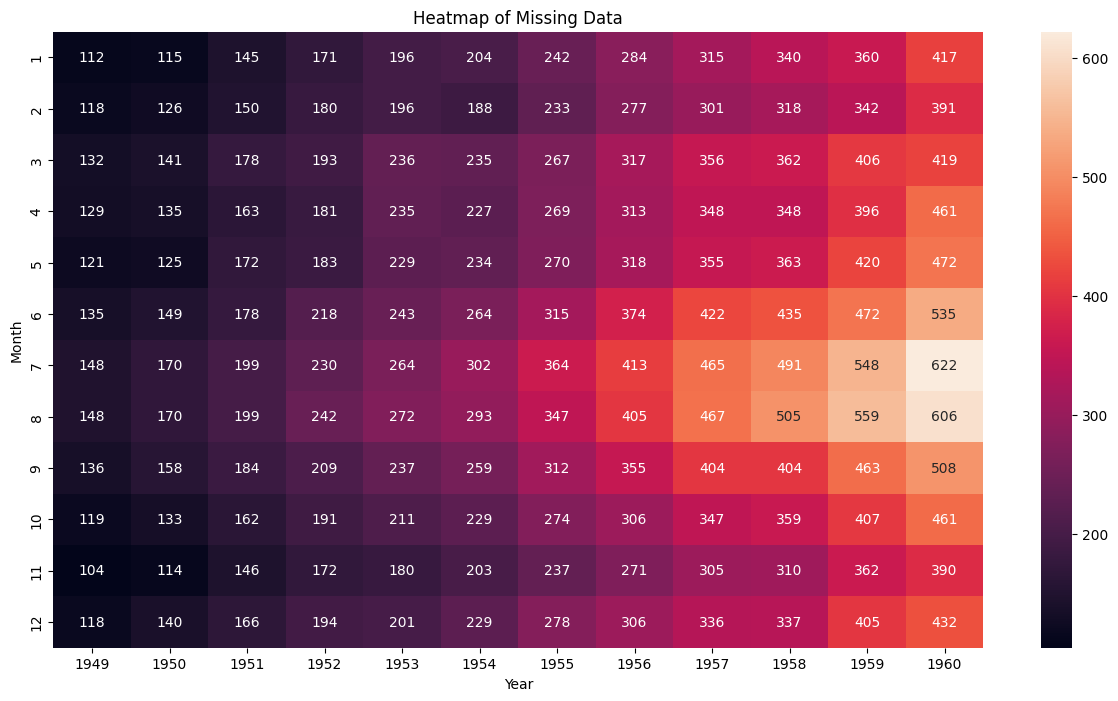

In [41]:
# prepping data for heatmap
heatmap_data = data.pivot(index='Month', columns='Year', values='#Passengers')

# heatmap of passenger count by month
plt.figure(figsize=(15,8))
sns.heatmap(heatmap_data, annot=True, fmt='g', annot_kws={"size":10})
plt.title("Heatmap of Missing Data")
plt.show()

#### Rolling Statistics
While the number of passengers has steadily increased over the years, the standard deviation staying relatively low shows us this growth isn't too far outside the paremeters of the y axis' mean over the years. This means this growth is consistent and not volatile.

In [30]:
def interactive_rolling_statistics_plot():
    rolling_mean = data['#Passengers'].rolling(window=30).mean()
    rolling_std = data['#Passengers'].rolling(window=30).std()

    fig = go.Figure()

    # stock Prices
    fig.add_trace(go.Scatter(x=data.index, y=data['#Passengers'], mode='lines', name='# of Passengers'))
    # rolling Mean
    fig.add_trace(go.Scatter(x=data.index, y=rolling_mean, mode='lines', name='30-Day Rolling Mean'))
    # rolling Standard Deviation
    fig.add_trace(go.Scatter(x=data.index, y=rolling_std, mode='lines', name='30-Day Rolling Std Dev'))

    fig.update_layout(title="Rolling Statistics Plot: # of Passengers Over Time",
                      xaxis_title="Date", yaxis_title="Passengers")
    fig.show()


# call the interactive functions
interactive_rolling_statistics_plot()

#### Lag Plot
Comparing the three lag plots together, we can see the different between the original and the lagged passengers gets more extreme the further back you go, which confirms the change in total passengers has gained momentum and been changing more year over year.

In [48]:
# lag plot
def interactive_lag_plot(month):
    # Creating a DataFrame for lagged values
    data_lag = pd.DataFrame({
        'Original': data['#Passengers'],
        'Lagged': data['#Passengers'].shift(month)  # Lagging by 1 month
    }).dropna()  # Drop rows where the lagged value is NaN

    # Scatter plot of Original vs. Lagged values
    fig = px.scatter(data_lag, x='Lagged', y='Original', title=f"Lag Plot: Stock Prices Lagged by {month} Period(s)")
    fig.show()

# Running the interactive lag plot function
interactive_lag_plot(1)
interactive_lag_plot(2)
interactive_lag_plot(3)



#### Boxplot
The month with the largest variation is in July, the 7th month. There aren't any outliers in this dataset.

In [47]:
# box plot
fig = px.box(data, x='Month', y='#Passengers', title='Boxplot: # of Passengers by Month')
fig.show()

### Overall Insights
In conclusion, the total number of passengers has increased consistently from 1949 to 1960, and a seasonality has shown up during the summer as an increase of passengers flying. I'd be curious to see how passenger count data continues into the early 2000's, then see the 9/11 count decrease, then rise again and likely decrease dramatically in 2020.